In [16]:
import torch 
from torch import nn 
from matplotlib import pyplot as plt 
%matplotlib inline
import numpy as np 
from pytorchsummary import summary #pip install pytorchsummary

In [17]:
datapoints = np.array([[1,0],[1,1],
                       [0,0],[0,1]],dtype=np.float32)
datapoints,datapoints.shape

(array([[1., 0.],
        [1., 1.],
        [0., 0.],
        [0., 1.]], dtype=float32),
 (4, 2))

In [18]:
labels = [1,0,0,1]


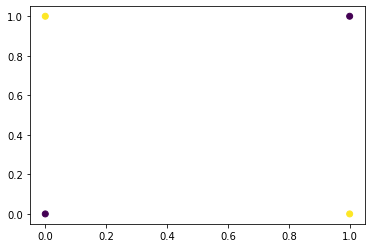

In [19]:
plt.scatter(datapoints[:,0],datapoints[:,1],c=labels)

In [20]:
class NoActi(nn.Module):
    def __init__(self,inputs,numclass) -> None:
        super(NoActi,self).__init__()
        self.nn = nn.Sequential(
            nn.Linear(inputs,2,bias=False),
            nn.Linear(2,numclass,bias=False),
        )
    
    def forward(self,x):
        return self.nn(x)

NoactivationModel = NoActi(2,1)
summary((2,),NoactivationModel),NoactivationModel

               Layer	Output Shape        	    Kernal Shape    	#params             	#(weights + bias)   	requires_grad
------------------------------------------------------------------------------------------------------------------------------------------------------
            Linear-1	[1, 2]              	       [2, 2]       	4                   	(4+0)               	   True   
            Linear-2	[1, 1]              	       [1, 2]       	2                   	(2+0)               	   True   
______________________________________________________________________________________________________________________________________________________

Total parameters 6
Total Non-Trainable parameters 0
Total Trainable parameters 6


((6, 6, 0),
 NoActi(
   (nn): Sequential(
     (0): Linear(in_features=2, out_features=2, bias=False)
     (1): Linear(in_features=2, out_features=1, bias=False)
   )
 ))

In [21]:
Xs = torch.tensor(datapoints) # changing numpy nd.array to pytorch tensors

noacti = NoactivationModel(Xs)
noacti

tensor([[-0.0921],
        [-0.0880],
        [ 0.0000],
        [ 0.0041]], grad_fn=<MmBackward0>)

In [22]:
def plot(array,labels):
    fig = plt.figure(figsize=(6,6))
    plt.scatter(array[:,0].detach().numpy(),np.zeros_like(array[:,0].detach().numpy()),c=labels)

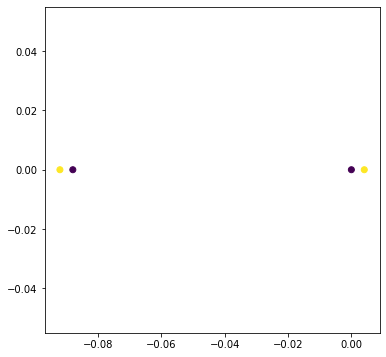

In [23]:
plot(noacti,labels)

In [24]:
_w0 = NoactivationModel.nn[0].weight.detach()
_w1 = NoactivationModel.nn[1].weight.detach()
_w0,_w1

(tensor([[ 0.5395,  0.6076],
         [ 0.0206, -0.2339]]),
 tensor([[-0.1547, -0.4192]]))

tensor([[ 0.5395,  1.1471,  0.0000,  0.6076],
        [ 0.0206, -0.2133,  0.0000, -0.2339]])


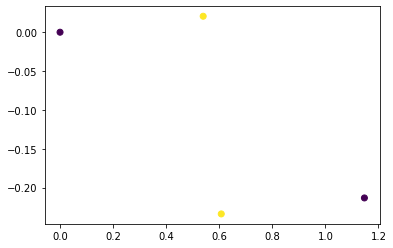

In [25]:
_a1 = torch.matmul(_w0,Xs.T)
print(_a1)
plt.scatter(_a1[0,:].numpy(),_a1[1,:].numpy(),c=labels)
# plt.axline((0, 0), slope=(-0.378/-0.0348), color="blue", linestyle='--')
# plt.axline((0, 0), slope=(-0.2901/-0.517), color="green", linestyle='--')


(tensor([[-0.0921, -0.0880,  0.0000,  0.0041]]),
 torch.Size([1, 4]),
 <matplotlib.collections.PathCollection at 0x1c66d39feb0>)

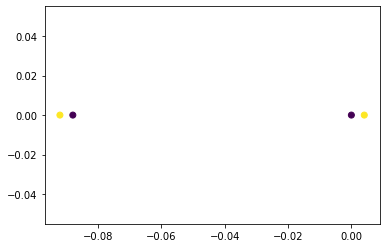

In [26]:
_a2 = torch.matmul(_w1,_a1)
_a2,_a2.shape,plt.scatter(_a2[0],[0]*4,c=labels)